In [1]:
!python data_add_label.py

Done.


In [3]:
!pip install seaborn

     |████████████████████████████████| 288 kB 16.8 MB/s eta 0:00:01


In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import defaultdict
import numpy as np

data_path = '/opt/ml/input/data/train/train_added_label.csv'

In [2]:
def age_cut(age):
    return age // 30

# wear: 0, incorrect: 1, Not Wear: 2
def mask(label):
    tmp = label // 6
    if tmp == 0:
        return 'wear'
    elif tmp == 1:
        return 'incorrect'
    
    return 'Not wear'

df = pd.read_csv(data_path)
df['mask'] = df['label'].apply(mask)

data_df = pd.read_csv(data_path)
data_df['age'] = data_df['age'].apply(age_cut)
data_df['mask'] = data_df['label'].apply(mask)

data_df = data_df.drop(columns=['id', 'path', 'image_path', 'race'])

# data_df.describe(include='all')
data_df.head()

,gender,age,label,mask
0,female,1,4,wear
1,female,1,4,wear
2,female,1,4,wear
3,female,1,4,wear
4,female,1,4,wear


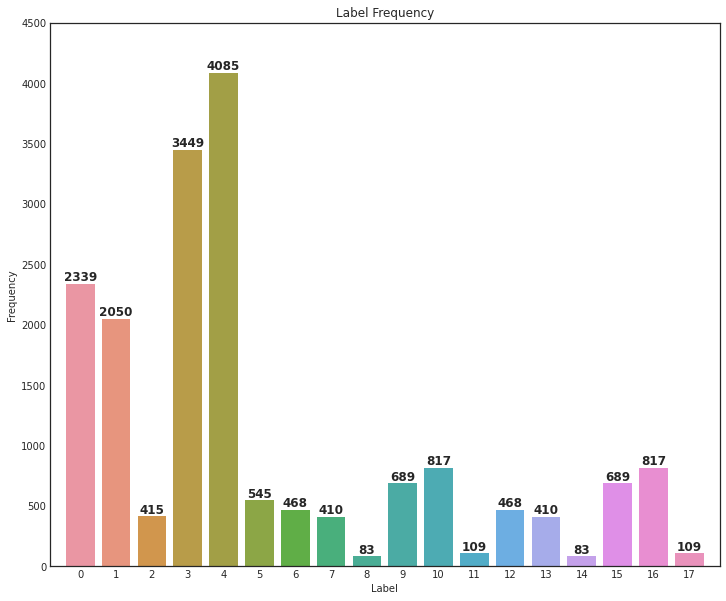

In [3]:
mpl.style.use('seaborn-white')

label_series = data_df['label'].value_counts()

fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# ax = sns.barplot(x=label_series.index, y=label_series)
ax = sns.countplot(x='label', data=data_df)

ax.margins(0.025)
ax.set_title('Label Frequency')
ax.set_ylim(0, 4500)
ax.set_xlabel('Label')
ax.set_ylabel('Frequency')

for label, label_count in zip(label_series.index, label_series.values):
    ax.text(x=label, y=label_count, s=label_count,
        va='bottom', ha='center', fontsize=12, fontweight='semibold'
    )

plt.show()

Class imbalance 문제가 있음을 확인하였음

# 1. gender별 마스크 착용 유무

<AxesSubplot:xlabel='gender', ylabel='count'>

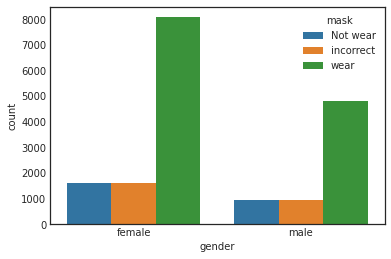

In [23]:
sns.countplot(x='gender',data=data_df,
              hue='mask',
              hue_order=sorted(data_df['mask'].unique())
             )

결과 봤을 때, 전체적으로 남성의 data가 적은 것을 확인

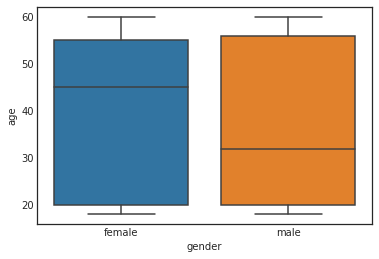

In [22]:
sns.boxplot(x='gender', y='age', data=df)
plt.show()

# 2. age별 label

<AxesSubplot:xlabel='age', ylabel='count'>

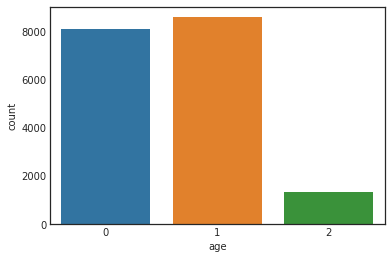

In [19]:
sns.countplot(x='age',data=data_df)

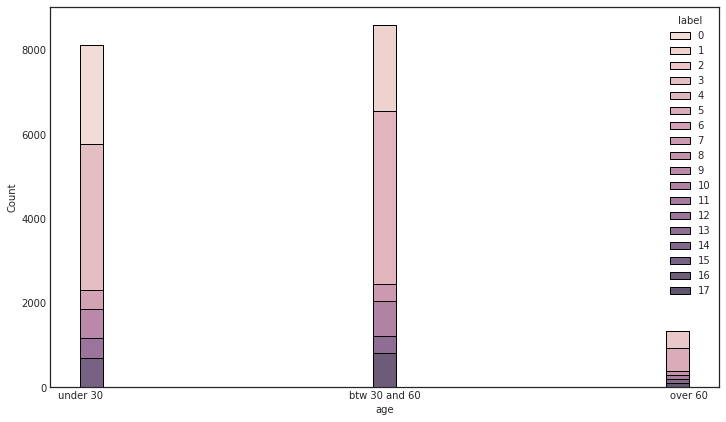

In [9]:
fig, ax = plt.subplots(figsize=(12, 7))

ax = sns.histplot(x='age', data=data_df, ax=ax,
             hue='label', 
             multiple='stack'
            )
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['under 30', 'btw 30 and 60', 'over 60'])

plt.show()

<AxesSubplot:xlabel='label', ylabel='count'>

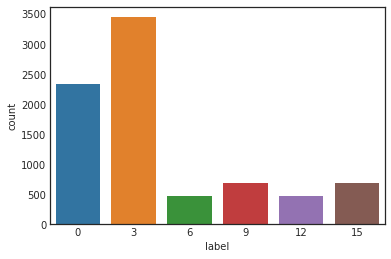

In [10]:
#Under 30
sns.countplot(x='label', data=data_df[data_df.age == 0])

<AxesSubplot:xlabel='label', ylabel='count'>

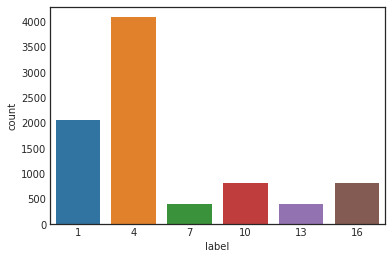

In [11]:
#btw 30 and 60
sns.countplot(x='label', data=data_df[data_df.age == 1])

<AxesSubplot:xlabel='label', ylabel='count'>

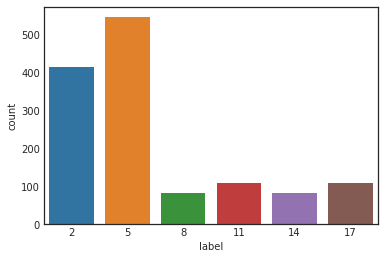

In [12]:
#over 60
sns.countplot(x='label', data=data_df[data_df.age == 2])

분석 결과 
1. 60대 이상의 데이터가 부족
2. 60대 이상에서의 incorrect, not wear의 비율이 다른 카테고리와 조금 다른 것 같음

In [13]:
df.head()

,id,gender,race,age,path,image_path,label,mask
0,000001,female,Asian,45,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,4,wear
1,000001,female,Asian,45,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,4,wear
2,000001,female,Asian,45,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,4,wear
3,000001,female,Asian,45,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,4,wear
4,000001,female,Asian,45,000001_female_Asian_45,/opt/ml/input/data/train/images/000001_female_...,4,wear


# 3. PCA

시도 중...

# 데이터 크기 확인

In [15]:
file_paths = df['image_path'].values.tolist()

In [16]:
import cv2
from tqdm import tqdm

shapes_dict = defaultdict(int)

for file_path in tqdm(file_paths):
    image = cv2.imread(file_path)
    shapes_dict[image.shape] += 1

100%|██████████| 18035/18035 [00:41<00:00, 437.47it/s]


In [17]:
shapes_dict

defaultdict(int, {(512, 384, 3): 18035})

In [24]:
data_path = '/opt/ml/input/data/eval/info.csv'
data_df = pd.read_csv(data_path)
file_paths = data_df['ImageID'].values.tolist()

In [27]:
import cv2
from tqdm import tqdm

shapes_dict = defaultdict(int)

for file_path in tqdm(file_paths):
    image = cv2.imread(f"/opt/ml/input/data/eval/images/{file_path}")
    shapes_dict[image.shape] += 1

100%|██████████| 12600/12600 [00:29<00:00, 422.59it/s]


In [28]:
shapes_dict

defaultdict(int, {(512, 384, 3): 12600})